In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
pd.options.plotting.backend = "plotly"
pd.set_option('display.max_columns', 150, 'display.max_rows', 100, 'display.max_colwidth', 15)
%matplotlib inline

#  Import Data 

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

In [3]:
df= df.rename(columns= {"expenses":"target"})
df.head(2)

age     sex   bmi  children smoker     region    target
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55

In [4]:
df.describe()

age          bmi     children        target
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000

In [5]:
target_variable= "target"
all_cols = df.drop(columns="target").columns.tolist()                      
cat_cols = df.drop(columns="target").select_dtypes(["object","category"]).columns.tolist()                      
num_cols= df.drop(columns="target").columns[~df.drop(columns="target").columns.isin(cat_cols)] 

# Column Types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   target    1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Check Missing values
Data has no missing values

In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
target      0
dtype: int64

# EDA

In [8]:
df.describe(include= "all")

age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.665471     1.094918    NaN        NaN   
std       14.049960   NaN     6.098382     1.205493    NaN        NaN   
min       18.000000   NaN    16.000000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.300000     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.700000     2.000000    NaN        NaN   
max       64.000000   NaN    53.100000     5.000000    NaN        NaN   

              target  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    13270.422414  
std     12110.011240  
min      1121.870000  
25%      4740.287500  
50%      9382.030000  
75%     16639.915000  
max     63770.430000

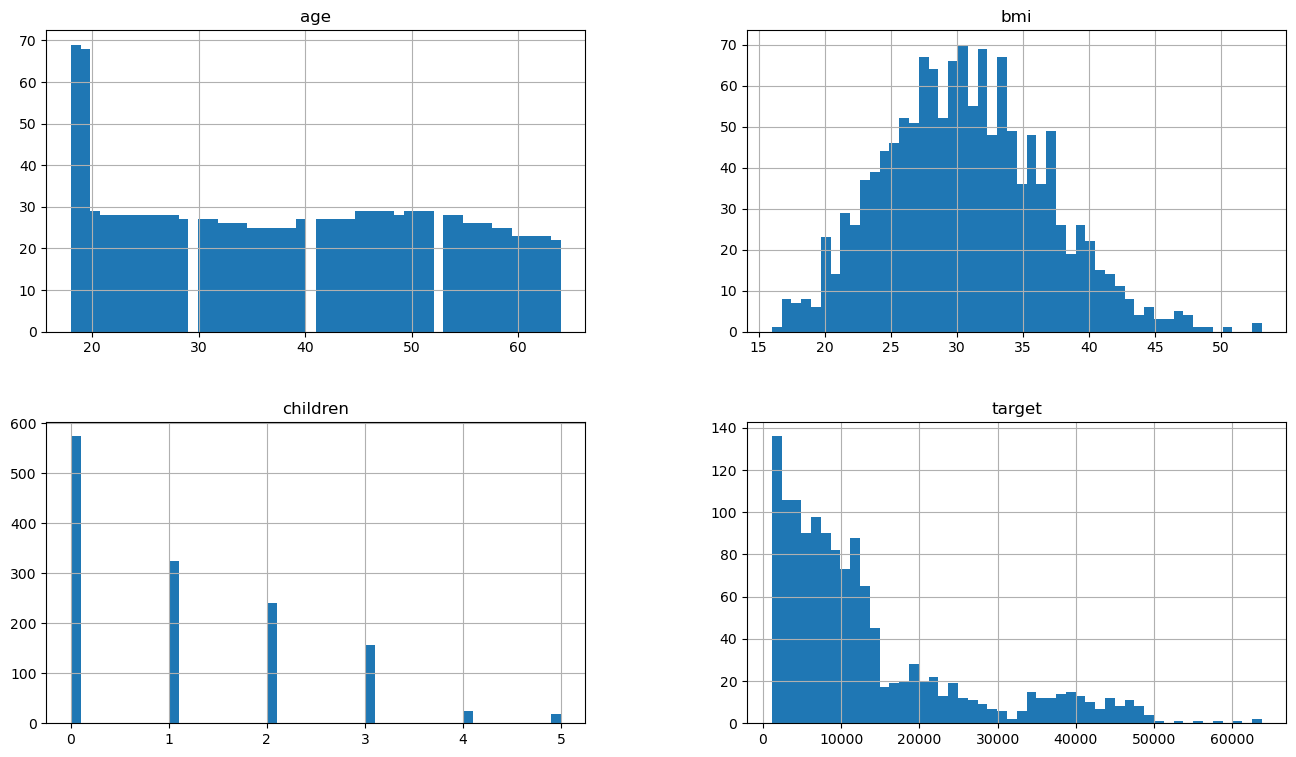

In [9]:
pd.options.plotting.backend = "matplotlib"
df.hist(
    bins=50, 
    figsize=(16,9)   
    )
plt.show()
pd.options.plotting.backend = "plotly"

Plot shows the histogram of variables. Age looks uniform, might be a good idea to create categories of age, bmi looks normal and taget variable has a right tail. We can adjust that by either taking a log or sqrt we will see how the model performs.

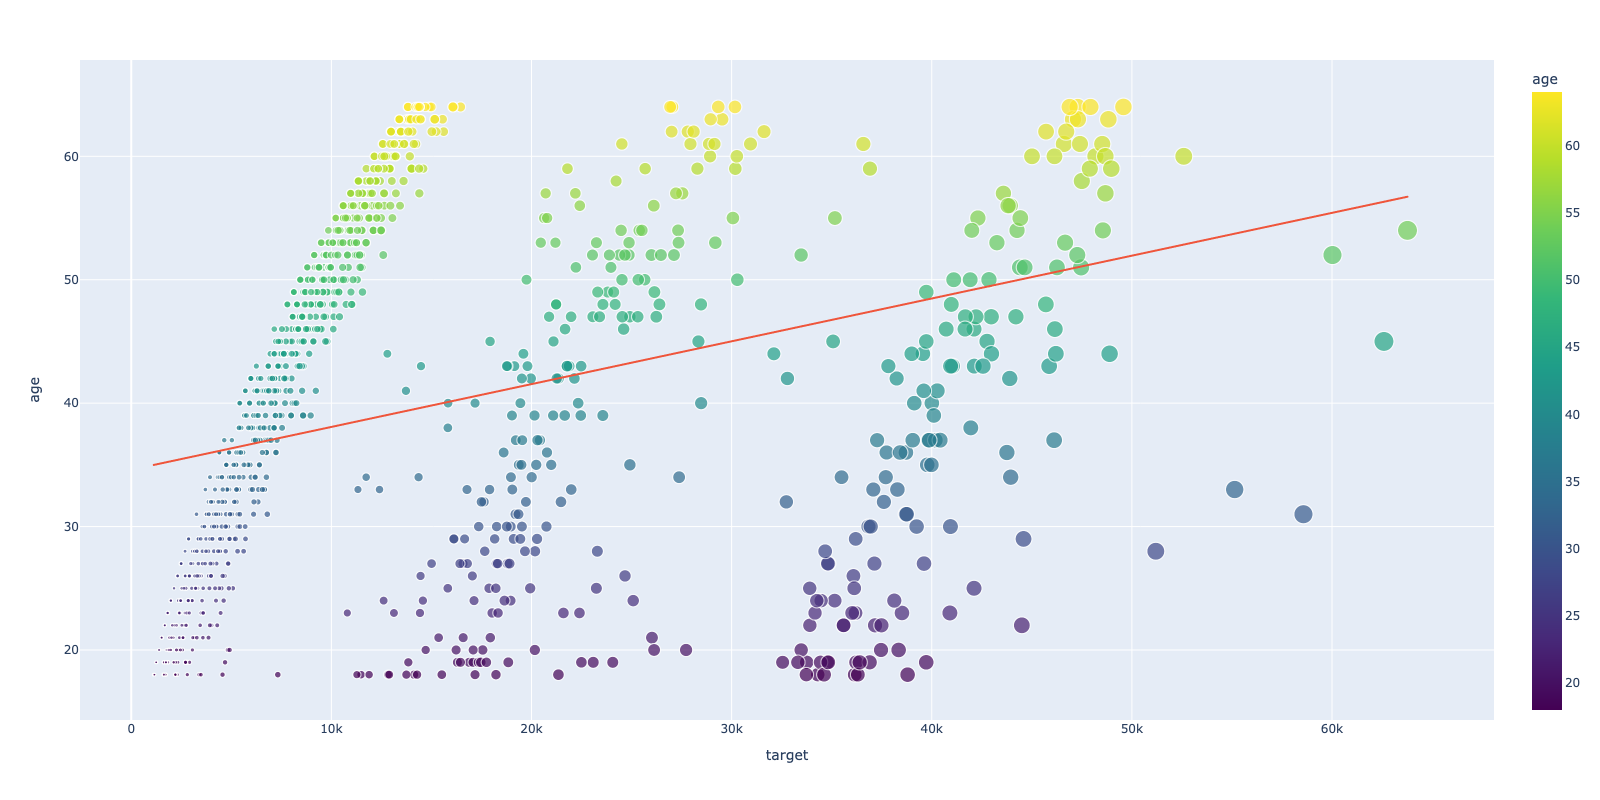

In [10]:
df.plot.scatter(
    y= "age", x= "target", size="target", 
    color= "age",
    width= 1600, height=800,
    color_continuous_scale=px.colors.sequential.Viridis,
    trendline= "ols"
     ).show("png") 

we see as the age is more the expense do increase but it seems from this graphs there is also something else at play bcz we have like three clusters in the plot

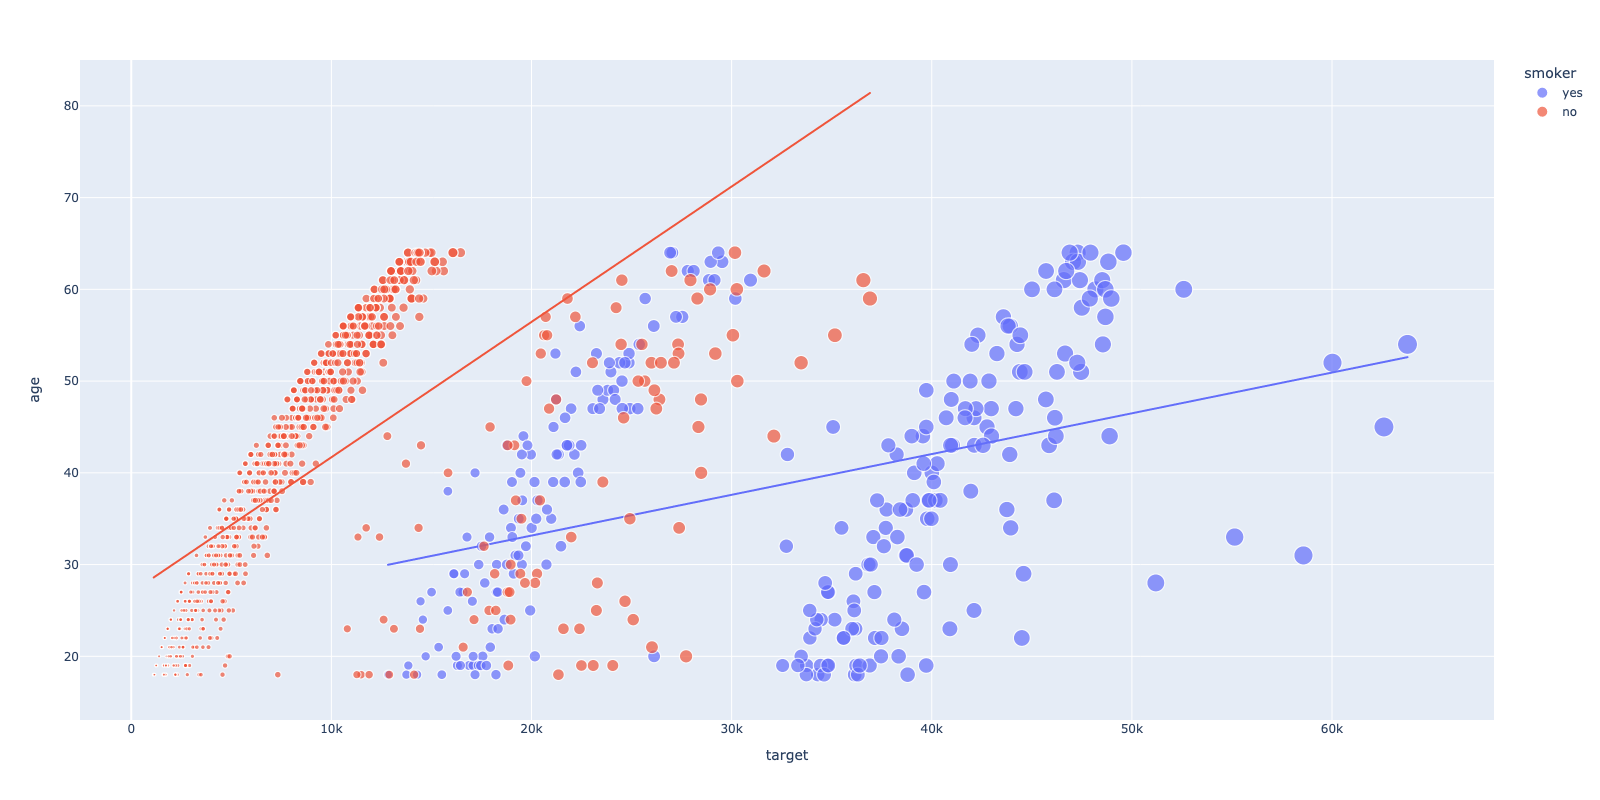

In [11]:
df.plot.scatter(
    y= "age", x= "target", 
    size="target", 
    color= "smoker", 
    width= 1600, height=800,
    color_continuous_scale=px.colors.sequential.Inferno,
    trendline= "ols" ).show("png")

This graph is more informative as it the variable at play is if individual is smoker or not. with age there is increase in expense but the smokers have the higher expense clearly.

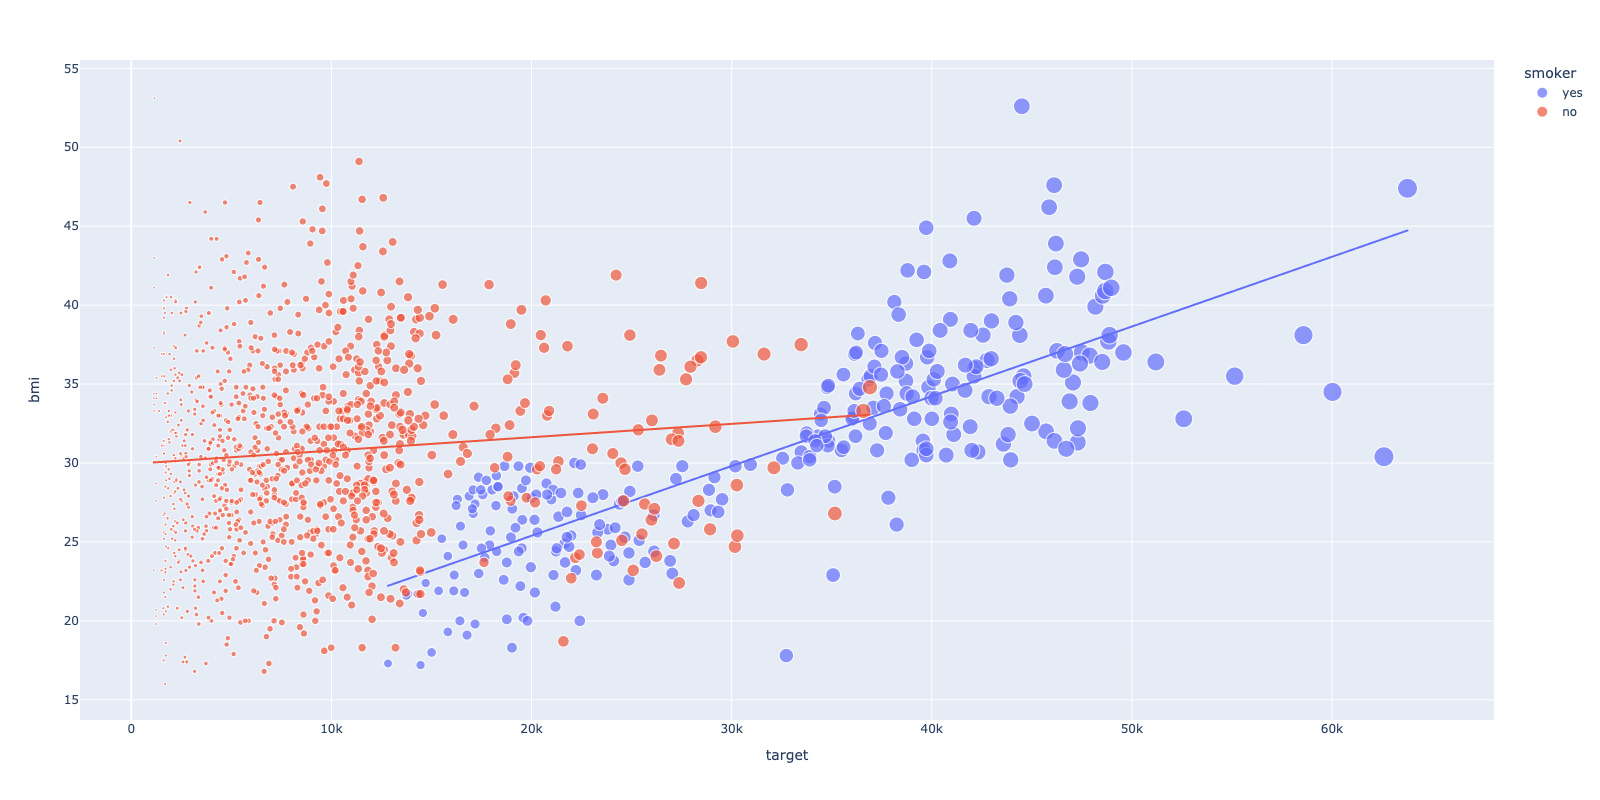

In [12]:
df.plot.scatter(
    y= "bmi", x= "target", 
    size="target", 
    color= "smoker", 
    width= 1600, height=800,
    color_continuous_scale=px.colors.sequential.Inferno,
    trendline= "ols" ).show("png")

Bmi and smoker have strong relationship , higher the bmi and person is a smoker lead to high target variable expenses.

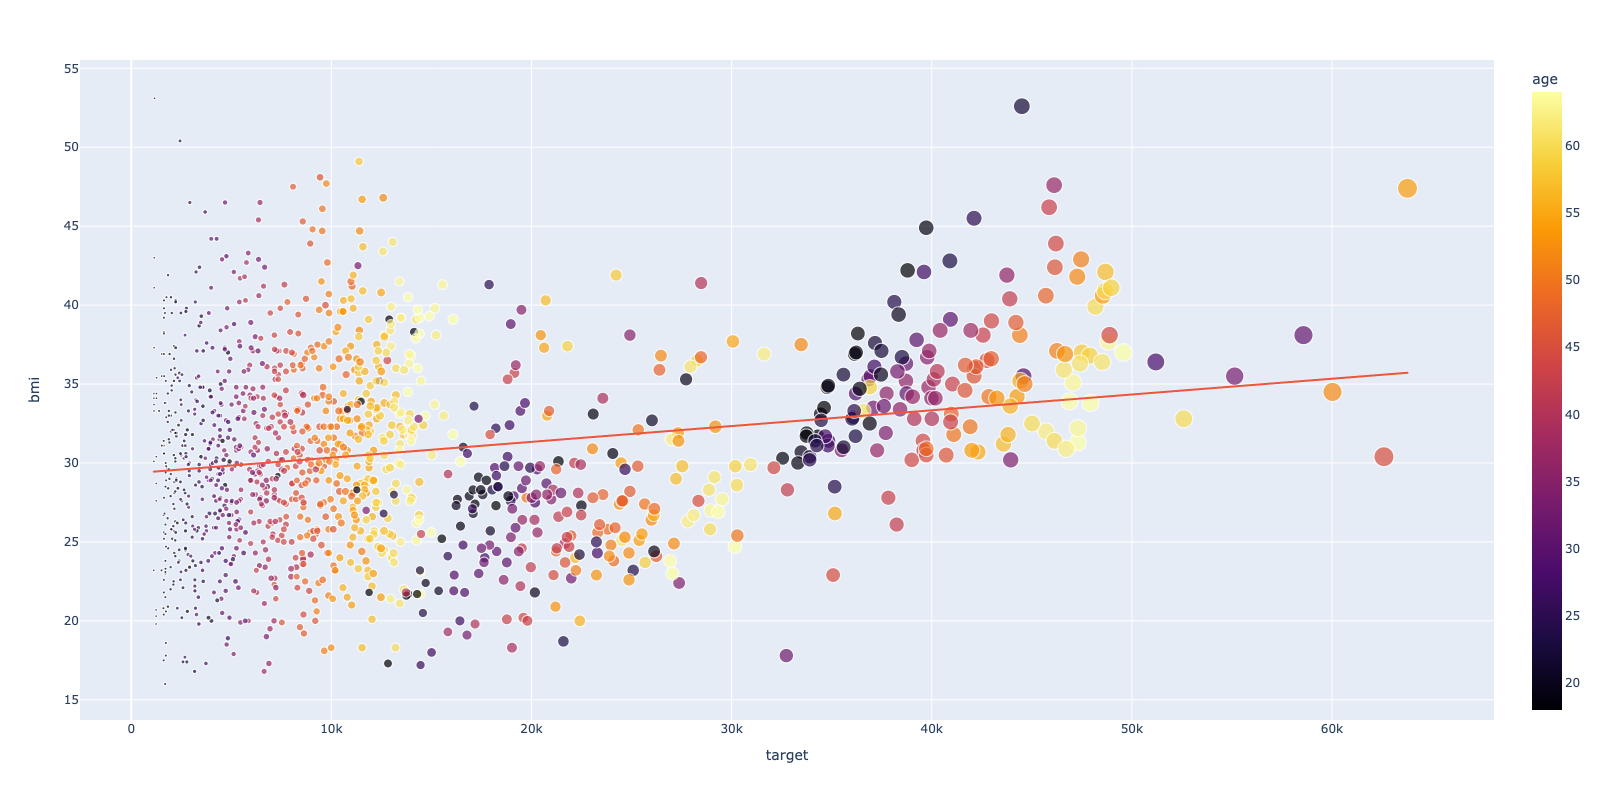

In [13]:
df.plot.scatter(
    y= "bmi", x= "target", 
    size="target", 
    color= "age", 
    width= 1600, height=800,
    color_continuous_scale=px.colors.sequential.Inferno,
    trendline= "ols" ).show("png") 

Bmi and age also have relationship , higher the bmi and age leads to higher expenses but relationship isnt as strong as bmi and smoker.

In [14]:
df.plot.scatter(x= "target", y= "children",color="children",  size="target", trendline= "ols"  )  

there is not a very clear relationship between number of children and target variable expense. 

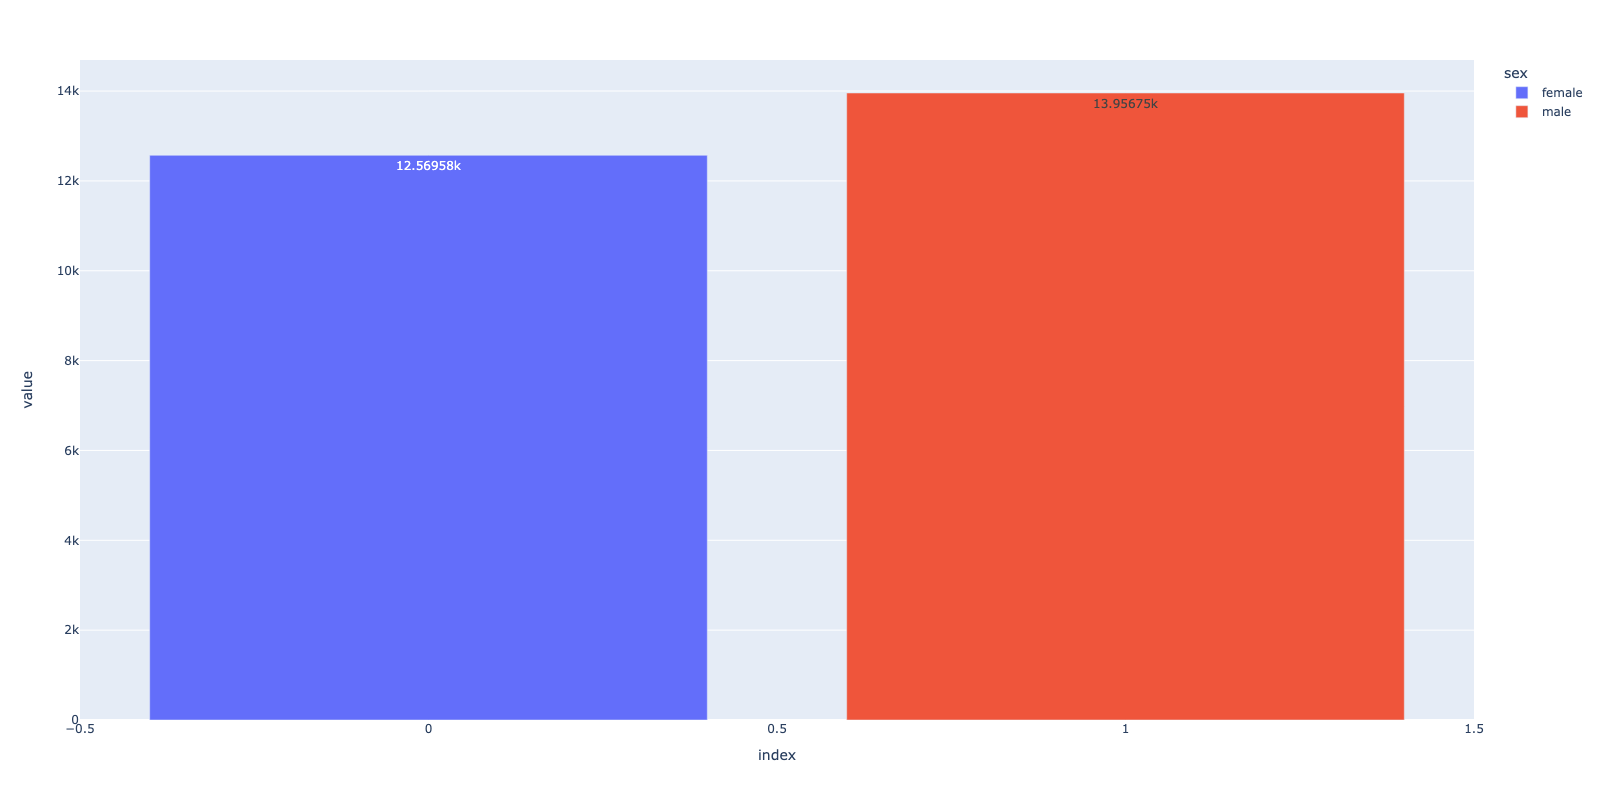

In [15]:
p=(
    df.groupby(["sex"]).agg(avg_expense= pd.NamedAgg("target", "mean"))
    .reset_index()
    .plot.bar(color= "sex",text_auto = True,width= 1600, height=800,)
)
p.show("png")

Sex doesnt show a significant significant differnce of target variable expense

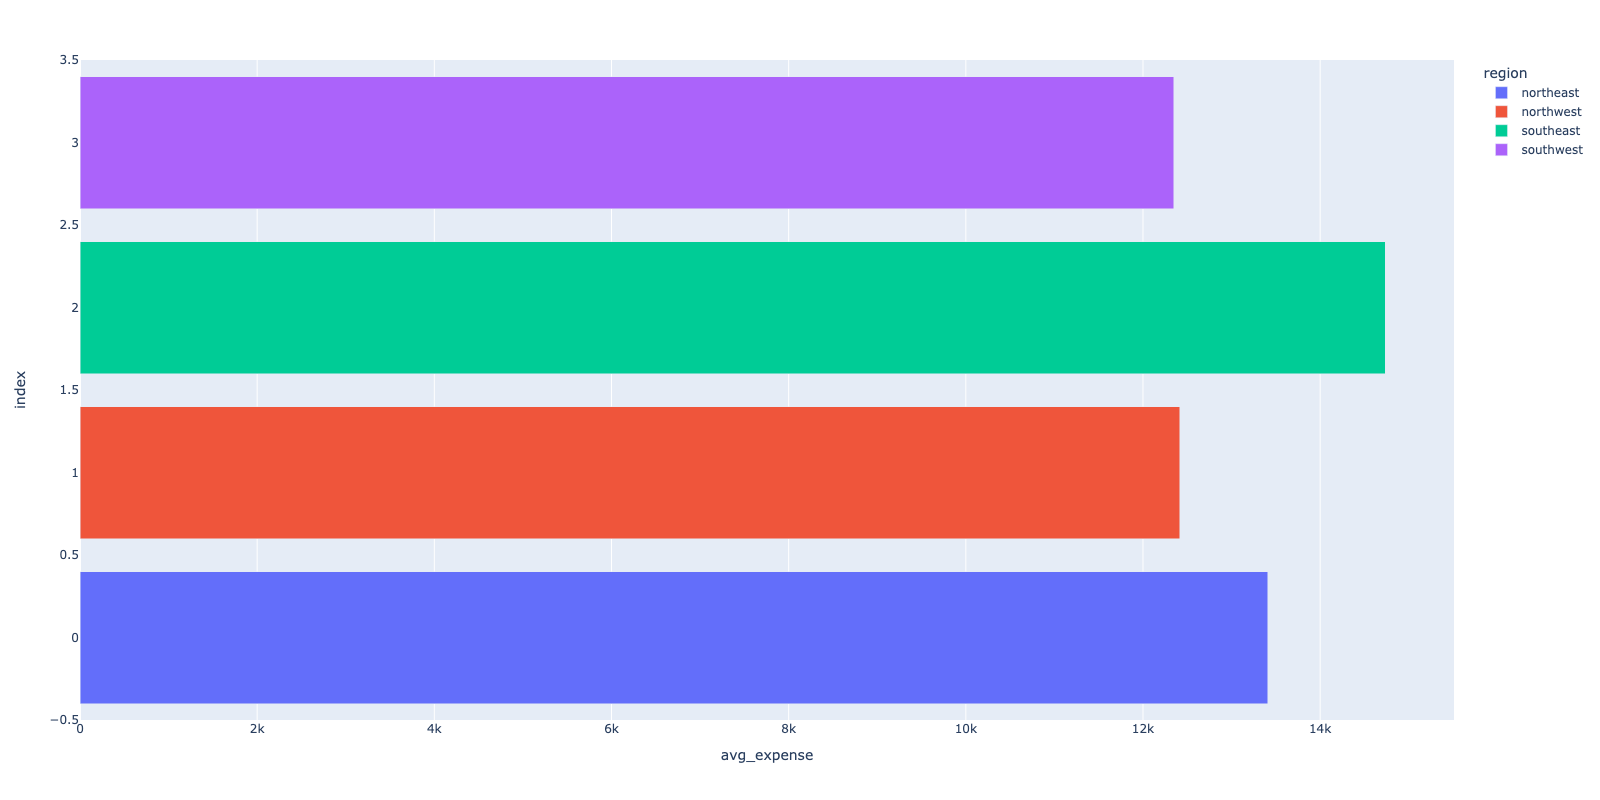

In [16]:
(
    df.groupby(["region"])
    .agg(avg_expense= pd.NamedAgg("target", "mean"))
    .reset_index()
    .plot.bar(x="avg_expense", color= "region" , barmode='stack',width= 1600, height=800,)
).show("png")

We do have significantly higher expense for region southeast and southwest.

In [17]:
import hvplot.pandas
import holoviews as hv
hv.extension("bokeh")
# Look for correlation between all variables and target variable
df_cor= df.corr(numeric_only= True).round(3)
df_cor
p = df_cor.hvplot.heatmap(x="columns", y= "index", rot =45, cmap= "Oranges" , width = 1000, height=400)
p * hv.Labels(p).opts(text_font_size = "8pt")

:Overlay
   .HeatMap.I :HeatMap   [columns,index]   (value)
   .Labels.I  :Labels   [columns,index]   (value)

The age and bmi have the highest correlation with out target variable and children variable has the lowest correlation with target variable. We will create some new interaction terms. 

## Feature Engineering

The Eda above gives us a good idea about creating new features using important interactions
Another way is to create a decision tree and plot the tree and decision rules and that can also help create new features. 

## Finding interactions using using decision Tree

# Split Data

In [18]:
from sklearn.model_selection import train_test_split
df_x = df.drop(columns="target").copy()
df_y = df["target"]
X_train, X_test, y_train, y_test =  train_test_split(df_x, df_y, test_size = 0.2, random_state =42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 6), (1070,), (268, 6), (268,))

In [19]:
from sklearn import tree
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import make_column_selector
num_pipe= Pipeline (steps =[("variance_filter", VarianceThreshold(threshold= 0.01))])
cat_pipe= Pipeline (steps =[("one_hot", OneHotEncoder (sparse_output=False, drop= "first", handle_unknown= "ignore"))])

prep = ColumnTransformer([                  
        ("c", cat_pipe, make_column_selector(dtype_include=object)),       
        ("n", num_pipe, make_column_selector(dtype_include=[int, "float"])),
    ],
    #remainder
    ).set_output(transform="pandas") # one column remaining: housing_median_age
prep.fit_transform(X_train, y_train).head() 

c__sex_male  c__smoker_yes  c__region_northwest  c__region_southeast  \
560           0.0            0.0             1.0                  0.0        
1285          0.0            0.0             0.0                  0.0        
1142          0.0            0.0             0.0                  1.0        
969           0.0            0.0             0.0                  1.0        
486           0.0            0.0             1.0                  0.0        

      c__region_southwest  n__age  n__bmi  n__children  
560              0.0         46.0    20.0          2.0  
1285             0.0         47.0    24.3          0.0  
1142             0.0         52.0    24.9          0.0  
969              0.0         39.0    34.3          5.0  
486              0.0         54.0    21.5          3.0

In [20]:
pipe= Pipeline(steps=[
            ("preprocess", prep),                                    
            ("model", tree.DecisionTreeRegressor(max_depth=3, random_state=42))
            ]).set_output(transform="pandas") 
pipe.fit(X_train, y_train) 

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('c',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x144600160>),
                                                 ('n',
                                                  Pipeline(steps=[('variance_filter',
                                                                   VarianceThreshold(threshold=0.01))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1446341c0>)])),
                ('model', DecisionTreeRegressor(max_depth=3, random_state=42))])

In [21]:
# Create function for valuation scores
from sklearn import metrics
def eval_scores(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    results= pd.DataFrame(        
        {"mae": [mae], "mse": [mse],"rmse": [rmse],"r2_square": [r2_square]})
    return results
### FUN DT PLOT
eval_scores(y_test, pipe.predict(X_test))
from sklearn.tree import  plot_tree, export_graphviz
#plt.figure(figsize=(12,7)) ;plot_tree(pipe["model"],max_depth= 3,filled = True,rounded = True,feature_names = pipe["feature_selection"].get_feature_names_out());plt.show()
import graphviz, pydotplus
def tree_plot(pipe):
    dot_data = export_graphviz(
    pipe["model"],feature_names= pipe["preprocess"].get_feature_names_out(),
    #class_names=  pipe["model"].classes_.astype('str') ,
    filled=True,rounded=True, special_characters=True,
    max_depth= 4 
    )        
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)    
    pydot_graph.set_size('"16,3"')    
    gvz_graph = graphviz.Source(pydot_graph.to_string())
    return gvz_graph
### Fun DT RULES
from sklearn.tree import export_text
def tree_rules(pipe):
    r = export_text(pipe["model"], feature_names= pipe["preprocess"].get_feature_names_out().tolist())
    return r

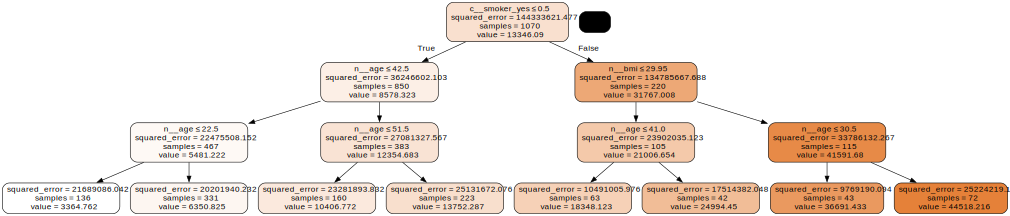

In [22]:
tree_plot(pipe)

In [23]:
tree_rules(pipe)

'|--- c__smoker_yes <= 0.50\n|   |--- n__age <= 42.50\n|   |   |--- n__age <= 22.50\n|   |   |   |--- value: [3364.76]\n|   |   |--- n__age >  22.50\n|   |   |   |--- value: [6350.83]\n|   |--- n__age >  42.50\n|   |   |--- n__age <= 51.50\n|   |   |   |--- value: [10406.77]\n|   |   |--- n__age >  51.50\n|   |   |   |--- value: [13752.29]\n|--- c__smoker_yes >  0.50\n|   |--- n__bmi <= 29.95\n|   |   |--- n__age <= 41.00\n|   |   |   |--- value: [18348.12]\n|   |   |--- n__age >  41.00\n|   |   |   |--- value: [24994.45]\n|   |--- n__bmi >  29.95\n|   |   |--- n__age <= 30.50\n|   |   |   |--- value: [36691.43]\n|   |   |--- n__age >  30.50\n|   |   |   |--- value: [44518.22]\n'

Looking at the decision tree, plot we can see that the age > 42 and bmi plus whether a person is a smoker or not are important interactions. So now we will create interactions terms using this 
information from decision tree.

### Lets create new features.

In [24]:
df=(
    df
    .assign(
        obese = lambda df_: np.where( df_.bmi > 30 , 1, 0) ,        
        bmi_cat = lambda df_: pd.cut(df_.bmi ,bins= 10, labels= False).astype("int"),
        smoker = lambda df_: np.where( df_.smoker == "yes", 1, 0) ,                
        obese_smoker = lambda df_: df_.obese *df_.smoker,
        bmi_age = lambda df_: df_.bmi*df_.age,
        old = lambda df_: np.where( df_.age > 42 , 1, 0) ,                
        age_childrem= lambda df_: df_.age* df_.children
        )
).drop(columns = ["bmi","children", "old"])
df

age     sex  smoker     region    target  obese  bmi_cat  obese_smoker  \
0      19  female       1  southwest  16884.92      0        3             0   
1      18    male       0  southeast   1725.55      1        4             0   
2      28    male       0  southeast   4449.46      1        4             0   
3      33    male       0  northwest  21984.47      0        1             0   
4      32    male       0  northwest   3866.86      0        3             0   
...   ...     ...     ...        ...       ...    ...      ...           ...   
1333   50    male       0  northwest  10600.55      1        4             0   
1334   18  female       0  northeast   2205.98      1        4             0   
1335   18  female       0  southeast   1629.83      1        5             0   
1336   21  female       0  southwest   2007.95      0        2             0   
1337   61  female       1  northwest  29141.36      0        3             0   

      bmi_age  age_childrem  
0       530.1             0  
1       608.4            18  
2       924.0            84  
3       749.1             0  
4       924.8             0  
...       ...           ...  
1333   1550.0           150  
1334    574.2             0  
1335    664.2             0  
1336    541.8             0  
1337   1775.1             0  

[1338 rows x 10 columns]

## Mean Encoding on Target Vriable features

In this type of mean encoding the we group the categoriacal variable and measure the mean of target variable.  
Mean encoding should be done after splitting the data. We need to get the means from the training set and map it to test set using join on the category used to groupby. 
We will use mean encoding for categorical variable Region.
We build a custom calss that will calculate mean encoding on training data and map it on region on validate in cross validation so that there is no data leakage from target variable.

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin
class MeanEncoding(BaseEstimator, TransformerMixin):    
    def __init__(self):        
        self.encoding = pd.DataFrame

    def fit(self, X, y):
        y=y.to_frame()
        # Calculate the mean target value for each category
        self.group_col= X.columns.tolist()[0]
        self.encoding = y[["target"]].groupby(X[self.group_col]).agg(target_mean= ("target", 'mean'))        
        return self
            
    def transform(self, X):
        # Replace the categorical column with the mean encoding   
        X[self.group_col+ "_encoded" ]= X[self.group_col].map(self.encoding["target_mean"])
        return X.drop(self.group_col, axis=1)

    def get_feature_names_out(self, names=None):       
        return [self.group_col+ "_encoded" ]

MeanEncoding().fit_transform(df[["region"]], df["target"])

/var/folders/3d/z1qzqy6s4p5_06dtsnr__3qh0000gn/T/ipykernel_78734/2161453055.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



region_encoded
0       12346.937908
1       14735.411538
2       14735.411538
3       12417.575169
4       12417.575169
...              ...
1333    12417.575169
1334    13406.384691
1335    14735.411538
1336    12346.937908
1337    12417.575169

[1338 rows x 1 columns]

# Correlation

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
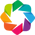

:Overlay
   .HeatMap.I :HeatMap   [columns,index]   (value)
   .Labels.I  :Labels   [columns,index]   (value)

In [26]:
hv.extension("bokeh")
import hvplot.pandas
import holoviews as hv
# Look for correlation between all variables and target variable
df_cor= df.corr(numeric_only= True).round(3)
df_cor
p = df_cor.hvplot.heatmap(x="columns", y= "index", rot =45, cmap= "Oranges" , width = 1000, height=400)
p * hv.Labels(p).opts(text_font_size = "8pt")

We have created some useful interaction variables using decison tree. The correlation plot shows that the bmi_cat, we see obese , bmi_age and old_obese are highly correlated to the target variable. 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   int64  
 1   sex           1338 non-null   object 
 2   smoker        1338 non-null   int64  
 3   region        1338 non-null   object 
 4   target        1338 non-null   float64
 5   obese         1338 non-null   int64  
 6   bmi_cat       1338 non-null   int64  
 7   obese_smoker  1338 non-null   int64  
 8   bmi_age       1338 non-null   float64
 9   age_childrem  1338 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 104.7+ KB


# Libraries Preprocess

In [28]:
# preprocess
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
# transformer/imputer/scaller/var filter
from sklearn.preprocessing import OneHotEncoder,StandardScaler, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold, SelectFromModel

# Library Models/Metrics pipelines

In [29]:
# Linear Models
from sklearn import linear_model ,tree, ensemble
import lightgbm

# Libraries GRID and sample split

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Split Data

In [31]:
from sklearn.model_selection import train_test_split
df_x = df.drop(columns="target").copy()
df_y = df["target"]

X_train, X_test, y_train, y_test =  train_test_split(df_x, df_y, test_size = 0.2, random_state =42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 9), (1070,), (268, 9), (268,))

# PIPELINE

# Preprocessor Pipeline

In [81]:
# seperate columns
all_cols = X_train.columns.tolist()                      
cat_cols = X_train.select_dtypes(["object","category"]).columns[X_train.select_dtypes(["object","category"]).columns != "region"]
num_cols= X_train.columns[~X_train.columns.isin(cat_cols)] 
num_cols

Index(['age', 'smoker', 'region', 'obese', 'bmi_cat', 'obese_smoker',
       'bmi_age', 'age_childrem'],
      dtype='object')

In [83]:
np.square(np.sqrt(4))

4.0

### Log transofrmer

In [91]:
mean_encoder_pipe= Pipeline (
        steps =[                         
        ('encoder', MeanEncoding()),
        ("std_scaler", StandardScaler()),                       
                ])
num_pipe= Pipeline (
        steps =[                        
        ("std_scaler", StandardScaler()),                       
        ("variance_filter", VarianceThreshold(threshold= 0.0001)),                     
                ]
                   )
cat_pipe= Pipeline (
        steps =[        
        ("one_hot", OneHotEncoder (sparse_output=False, drop= "first", handle_unknown= "ignore")),
                ])
prep = ColumnTransformer([    
        ("c", cat_pipe, cat_cols),                        
        ("n", num_pipe, make_column_selector(dtype_include= [int,"float"])),        
        ("m_r", mean_encoder_pipe, ["region"] )       
    ],
    #remainder= num_pipe
    ).set_output(transform="pandas") # one column remaining: housing_median_age
prep.fit_transform(X_train, y_train)

c__sex_male    n__age  n__smoker  n__obese  n__bmi_cat  n__obese_smoker  \
560           0.0  6.782330        0.0       0.0    1.000000             0.0    
1285          0.0  6.855655        0.0       0.0    1.414214             0.0    
1142          0.0  7.211103        0.0       0.0    1.414214             0.0    
969           0.0  6.244998        0.0       1.0    2.000000             0.0    
486           0.0  7.348469        0.0       0.0    1.000000             0.0    
...           ...       ...        ...       ...         ...             ...    
1095          0.0  4.242641        0.0       1.0    2.000000             0.0    
1130          0.0  6.244998        0.0       0.0    1.414214             0.0    
1294          1.0  7.615773        0.0       0.0    1.414214             0.0    
860           0.0  6.082763        1.0       1.0    2.828427             1.0    
1126          1.0  7.416198        0.0       0.0    1.732051             0.0    

      n__bmi_age  n__age_childrem  m_r__region_encoded  
560    30.331502        9.591663        -0.839999       
1285   33.794970        0.000000        -0.015186       
1142   35.983329        0.000000         1.569715       
969    36.574581       13.964240         1.569715       
486    34.073450       12.727922        -0.839999       
...          ...             ...              ...       
1095   23.773935        8.485281        -0.015186       
1130   30.530313       13.964240         1.569715       
1294   38.230878        0.000000        -0.015186       
860    41.966653        8.602325        -0.852784       
1126   40.552435        0.000000        -0.852784       

[1070 rows x 9 columns]

# Models
We will create a pipeline for the models and preprocing data pipeline.

In [60]:
MLA= {    
    # "lm":    linear_model.LinearRegression(), 
    'ridge': linear_model.Ridge(alpha= 100),               
    "dt" : tree.DecisionTreeRegressor(max_depth=3),    
    "lgb": lightgbm.LGBMRegressor()    
    } 

## Decision Tree
> A decision tree is a type of machine learning algorithm that is used for classification or regression tasks. The basic idea behind a decision tree is to divide the input data into smaller and smaller subsets based on some criteria, until the subsets are as homogeneous as possible with respect to the target variable. The criteria used for splitting the data at each node of the tree can be chosen based on different measures of impurity, such as Gini index, entropy, or classification error.

> The decision tree algorithm works by recursively splitting the data into subsets based on the chosen criteria, and then building a tree structure that represents the decision rules that were learned from the data. At each node of the tree, the algorithm chooses the best feature and threshold to split the data, based on the criteria that maximizes the purity of the resulting subsets. Once the tree is built, it can be used to make predictions for new data points by traversing the tree from the root to a leaf node, and assigning the class label that corresponds to that leaf node.

> The Gini index is a measure of impurity that is commonly used in decision trees for classification tasks. The Gini index of a set of samples S is defined as:
$$ Gini(S) = 1 - \sum_{i=1}^{k} (p_i)^2 $$
> where k is the number of classes, and $p_i$ is the proportion of samples in S that belong to class i. The Gini index takes values between 0 and 1, with 0 representing perfect purity (all samples belong to the same class), and 1 representing maximum impurity (the samples are equally distributed across all classes).

## Ridge Rregression
> Ridge regression is a regularization technique that is used to prevent overfitting in linear regression models. It adds a penalty term to the standard linear regression cost function in order to shrink the regression coefficients towards zero. This penalty term is determined by the regularization parameter λ, which controls the degree of shrinkage.

> The cost function for Ridge regression is given by:
$$ J(\beta) = \sum_{i=1}^n (y_i - \sum_{j=1}^p x_{ij}\beta_j)^2 + \lambda\sum_{j=1}^p \beta_j^2 $$

> where:
$J(\beta)$ is the cost function
$n$ is the number of observations
$p$ is the number of predictor variables
$y_i$ is the target variable for the i-th observation
$x_{ij}$ is the value of the j-th predictor variable for the i-th observation
$\beta_j$ is the regression coefficient for the j-th predictor variable
$\lambda$ is the regularization parameter, which determines the strength of the penalty term

## LightGBM
> LightGBM is a popular gradient boosting framework that uses a histogram-based approach to speed up training and improve accuracy.

> The basic formula for the LightGBM model:
$\hat{y_i} = \sum_{j=1}^J w_j I(x_i \in R_j)$
> In this formula, $\hat{y_i}$ is the predicted value for the $i$th data point, $x_i$ is the feature vector for the $i$th data point, $J$ is the number of leaves in the tree, $w_j$ is the weight associated with the $j$th leaf, and $I(x_i \in R_j)$ is an indicator function that is equal to 1 if $x_i$ falls within the region $R_j$ defined by the $j$th leaf and 0 otherwise.

The LightGBM algorithm uses a gradient boosting approach, where each tree in the ensemble is trained to correct the errors of the previous trees. The objective function that the algorithm optimizes is typically a loss function that measures the discrepancy between the predicted values and the true values of the training data. The specific loss function depends on the task at hand, such as regression or classification.

# Feature Selection

We use sklearn select from model method to select the best features. we use lasso regression as the selected model and pass the alpha as variable in the parameters so it can 
remove the redundant variables. 
## LASSO Regression
> Least absolute shrinkage and selection operator regression or Lasso is a regularised version of linear model that estimates sparse coefficients. 
> Lasso regression is a type of linear regression that helps us choose which features of our data are the most important. It does this by adding a penalty to the size of the coefficients for each    feature. This penalty forces the coefficients to be smaller, which in turn forces some of them to be exactly zero. Features with zero coefficients are essentially ignored by the model, so lasso regression can be used for feature selection.

> Mathematically, it consists of a linear model trained with $\ell_1$ prior as regularizer. The objective function to minimize is:
$$\text{Lasso regression: } \min_{\beta_0, \beta} \left\{ \frac{1}{2n} \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j)^2 + \alpha \sum_{j=1}^p |\beta_j| \right\}$$


> In this formula, $\beta_0, \beta_1, ..., \beta_p$ are the coefficients of the linear regression model. $n$ is the number of samples in the dataset, $p$ is the number of features, $y_i$ is the target variable for sample $i$, and $x_{ij}$ is the value of feature $j$ for sample $i$. The term inside the curly brackets is the objective function that we want to minimize.

> The first part of the objective function is the sum of squared errors (SSE) between the actual target variable values and the predicted values based on the regression model. The second part of the objective function is the sum of the absolute values of the regression coefficients multiplied by a tuning parameter $\alpha$. This second part of the formula is what makes Lasso regression unique, as it introduces a penalty term that encourages the coefficients to be as small as possible, thereby shrinking the coefficients towards zero. This results in some of the coefficients being exactly zero, effectively performing feature selection.

# Create complete preprocess + model pipes

In [61]:

pipes = {}
for x in MLA.keys():
        pip= Pipeline(steps=[
            ("preprocess", prep),
            ('poly', PolynomialFeatures(degree= 1,  interaction_only= True,  include_bias=False)),
            ('feature_selection', SelectFromModel(linear_model.Lasso(alpha= 1000, random_state=42))),
            #('feature_selection', SelectFromModel(lightgbm.LGBMRegressor(n_jobs=-1))),
            ("model", MLA[x])
            ]).set_output(transform="pandas")    
        pipes[x]=  pip
pipes.keys()

dict_keys(['ridge', 'dt', 'lgb'])

## Run all models once

In [63]:
scores= []
for x in MLA.keys():    
    pipes[x].fit(X_train, y_train)     
    scores.append(eval_scores(y_test, pipes[x].predict(X_test)).assign(model = x))
pd.concat(scores).sort_values("r2_square", ascending =False).round(4)

mae           mse       rmse  r2_square  model
0  2711.1004  2.005170e+07  4477.9128     0.8708  ridge
0  2621.7955  2.040865e+07  4517.5929     0.8685    lgb
0  2923.4383  2.157404e+07  4644.7859     0.8610     dt

In [64]:
cv_scores= []
scores= []
plts= []
for x in MLA.keys():    
    cv_model_score = cross_validate(
        pipes[x] ,X_train, y_train,cv=10,return_train_score=True, n_jobs=-1, verbose= 0)
    cv_model_score_mean= (
        pd.DataFrame.from_dict(cv_model_score).agg(["mean"]).assign(model=x))
    cv_scores.append(cv_model_score_mean)         

pd.concat(cv_scores).sort_values("test_score", ascending =False)

fit_time  score_time  test_score  train_score  model
mean  0.019289    0.006775    0.843707     0.849251  ridge
mean  0.013770    0.006055    0.832241     0.845070     dt
mean  0.036171    0.007684    0.828959     0.911482    lgb

The training score on lgb is .91 and test score is .83 we can can imporve this as the model is overfitting on test data.
We will now fine tune hyperparameters to improve our model and eliminate overfitting using BayesianSearch and cross validation.

## Bayesian Search

### Bayesian Hyperparameter

In [65]:
pipes.keys()
from skopt.space import Real, Categorical, Integer
# Polinomial
grid_poly = Integer(1,2)
# Linear models
grid_alpha =  Real(300 , 700)
# tree based models
grid_learn_rate = Real(0.01, .1,)
grid_n_estimator = Integer(100, 200)# Number of trees in the forest.
max_features = [1.0]# len(pipes["rf"]["preprocess"].fit_transform(X_train))]
grid_max_depth = Integer(2,4) #The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node.

MLA_params = {      
    "ridge" : [{              
        #'preprocess__geo__n_clusters': grid_clusters,        
        "poly__degree": grid_poly,
        "feature_selection__estimator__alpha": grid_alpha,
        'model__alpha': grid_alpha,                
            }],                               
    "dt": [{
        "poly__degree": grid_poly,        
        "feature_selection__estimator__alpha": grid_alpha,
        'model__max_depth': grid_max_depth, 
        'model__max_features': max_features,                        
            }],           
    "lgb": [{        
        "poly__degree": grid_poly,        
        "feature_selection__estimator__alpha": grid_alpha,        
        'model__n_estimators': grid_n_estimator,        
        'model__max_depth': grid_max_depth,
        'model__learning_rate': grid_learn_rate,                 
        }]    
    } 

In [66]:
from skopt import BayesSearchCV
import warnings
warnings.filterwarnings("ignore", category= Warning)
cv_split = KFold(n_splits= 10, random_state=10 , shuffle=True)

best_model_scores= {}
best_models = {}

for x in MLA.keys():
    # log-uniform: understand as search over p = exp(x) by varying x
    opt = BayesSearchCV(
        pipes[x],
        MLA_params[x],
        n_iter=25,
        cv= cv_split,
        verbose=0,
        random_state= 421,
        n_jobs= -1
    )
    opt.fit(X_train, y_train)
    print(f"val. score: {opt.best_score_}  model:{x} "  )
    print(f"test score: {opt.score(X_test, y_test)}  model:{x}"  )
    best_model_scores[x] = [opt.best_score_]
    best_models[x] =  opt.best_params_


val. score: 0.8321462884059848  model:ridge 
test score: 0.8566876176296065  model:ridge
val. score: 0.8412515689256418  model:dt 
test score: 0.8807832628763038  model:dt
val. score: 0.8518755296308068  model:lgb 
test score: 0.8858126130984008  model:lgb


In [67]:
pd.DataFrame.from_dict(best_model_scores)

ridge        dt       lgb
0  0.832146  0.841252  0.851876

The training scores for all three models are given below and lgb is doing the best 

## Model lgb

In [68]:
test_model_variable= "lgb"

In [69]:
pipe_lgb= pipes[test_model_variable]
pipe_lgb.set_params(**dict(best_models[test_model_variable]))
pipe_lgb.fit(X_train, y_train)
eval_scores(y_test, pipe_lgb.predict(X_test))

mae           mse         rmse  r2_square
0  2419.572503  1.772745e+07  4210.397514   0.885813

The R2 score on the  test set for lgb is .88 and rmse is 4205.

In [70]:
pipe_lgb[0:3].fit_transform(X_train, y_train).head()

n__age  n__smoker  n__bmi_age  n__age_childrem  n__age n__bmi_age  \
560   0.532767  -0.508747   -0.483507        1.032011        -0.257597      
1285  0.596140  -0.508747   -0.026172       -1.054031        -0.015602      
1142  0.903343  -0.508747    0.262790       -1.054031         0.237389      
969   0.068367  -0.508747    0.340862        1.982981         0.023304      
486   1.022065  -0.508747    0.010600        1.714101         0.010833      

      n__smoker n__bmi_cat  n__smoker n__obese_smoker  
560         0.789532              0.175681             
1285        0.370676              0.175681             
1142        0.370676              0.175681             
969        -0.221676              0.175681             
486         0.789532              0.175681

># Actuals vs Predicted Values

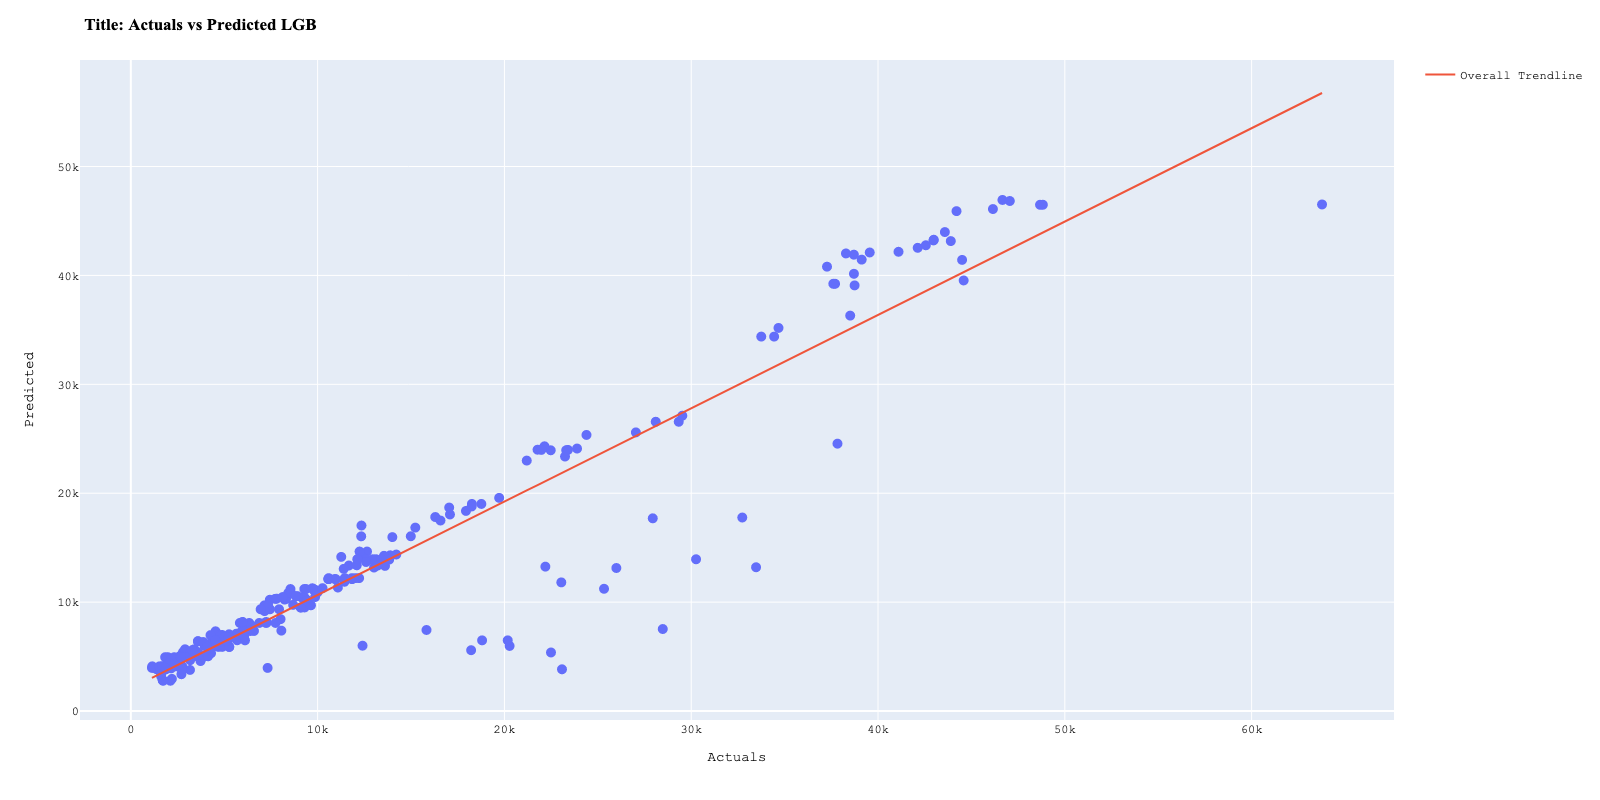

In [71]:
pred_lgb= pd.DataFrame({
    "predictions": pipe_lgb.predict(X_test),
    "actuals": y_test
    })
(
    pred_lgb
    .plot.scatter(x= "actuals", y= "predictions",
                  trendline= "ols",                                      
                  width= 1600, height=800,
                  trendline_scope= "overall"                                 
                  )           
    .update_traces(marker={"size":10})
    .update_layout(            
            title = "<b> Title: Actuals vs Predicted LGB </b>",
            xaxis_title = "Actuals",                       
            yaxis_title = "Predicted",                       
            font_family="Courier New",
            font_color="black",
            font_size = 12,
            title_font_family="Times New Roman",
            title_font_color="black",        
            legend_title_font_color= "grey"
            )                       
    
).show("png")

># Cross Validation

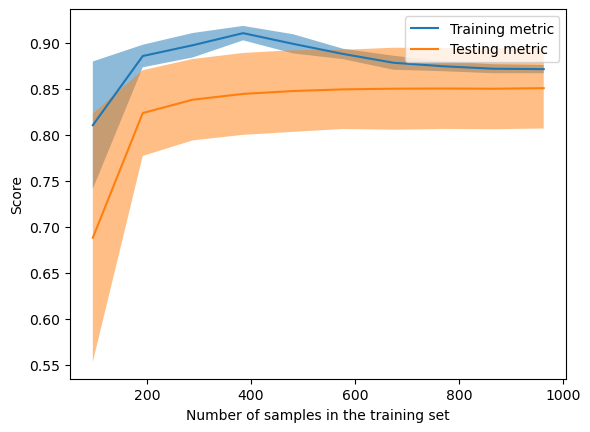

In [72]:
from sklearn.model_selection import LearningCurveDisplay   
LearningCurveDisplay.from_estimator(
    pipe_lgb, X_train, y_train, cv=10, n_jobs=-1, score_type= "both", train_sizes= np.linspace(0.1, 1, 10 )
    )

From cross validation we see that our model is performing well on test data and is not overfitting

## Model Ridge

In [73]:
test_model_variable= "ridge"

In [74]:
dict(best_models[test_model_variable])

{'feature_selection__estimator__alpha': 300.0,
 'model__alpha': 300.0,
 'poly__degree': 2}

In [75]:
pipe_ridge= pipes[test_model_variable]
pipe_ridge.set_params(**dict(best_models[test_model_variable]))
print(pipe_ridge["model"].get_params());pipe_ridge.fit(X_train, y_train)
eval_scores(y_test, pipe_ridge.predict(X_test))

{'alpha': 300.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}


mae           mse        rmse  r2_square
0  3220.009816  2.224907e+07  4716.89155   0.856688

In [76]:
pipe_ridge[0:3].fit_transform(X_train, y_train).head(3)

n__age  n__smoker  n__bmi_age  n__age_childrem  n__age n__bmi_age  \
560   0.532767  -0.508747   -0.483507        1.032011        -0.257597      
1285  0.596140  -0.508747   -0.026172       -1.054031        -0.015602      
1142  0.903343  -0.508747    0.262790       -1.054031         0.237389      

      n__smoker n__bmi_cat  n__smoker n__obese_smoker  
560         0.789532              0.175681             
1285        0.370676              0.175681             
1142        0.370676              0.175681

># Test-Model-Variable

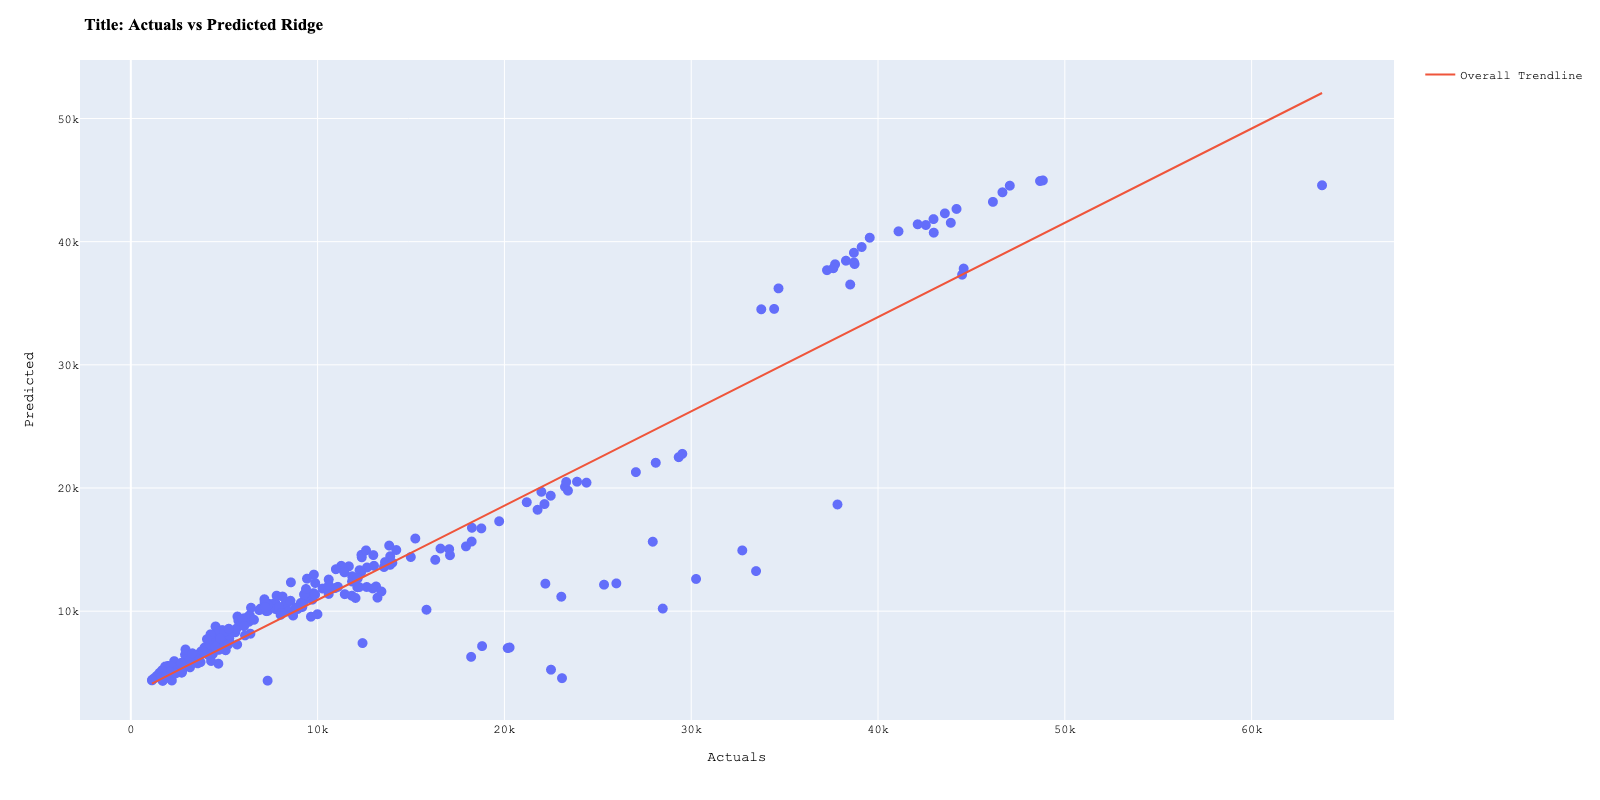

In [77]:
pred_ridge= pd.DataFrame({
    "predictions": pipe_ridge.predict(X_test),
    "actuals": y_test
    })
(
    pred_ridge
    .plot.scatter(x= "actuals", y= "predictions",
                  trendline= "ols",                                      
                  width= 1600, height=800,
                  trendline_scope= "overall"                                 
                  )           
    .update_traces(marker={"size":10})
    .update_layout(            
            title = "<b> Title: Actuals vs Predicted Ridge </b>",
            xaxis_title = "Actuals",                       
            yaxis_title = "Predicted",                       
            font_family="Courier New",
            font_color="black",
            font_size = 12,
            title_font_family="Times New Roman",
            title_font_color="black",        
            legend_title_font_color= "grey"
            )                       
    
).show("png")

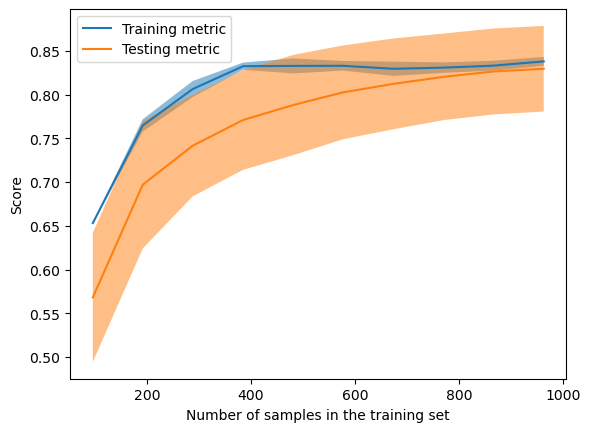

In [78]:
LearningCurveDisplay.from_estimator(
    pipe_ridge, X_train, y_train, cv=10, n_jobs=-1, score_type= "both", train_sizes= np.linspace(0.1, 1, 10 )
    )

# Conclusion:

In this notebook, we analyzed the medical insurance dataset to create insights and build a predictive model to predict the medical expenses of patients.

We started by importing necessary libraries and data into the notebook. We then did some exploratory data analysis to understand the data and its relationship with the target variable. We found that age, BMI, smoker, and region have a significant impact on medical expenses, while children and gender do not show a significant effect.

We also created some new interaction features to capture the impact of age and BMI on medical expenses. We found that mean encoding for categorical variables can be a useful technique in capturing their relationship with the target variable.

We trained a model using Ridge, Decision Tree and Light GBM. Finally we selected the best model of Light GBM with r2 of .885. 

In conclusion, this notebook provides a good foundation for further analysis and modeling of the medical insurance dataset.m